# Analyse de données de films

Nous proposons de travailler sur des données décrivant des films. Les possibilités sont larges et vous êtes évalués sur vos propositions et votre méthodologie plus que sur vos résultats.

Les données de départ sont disponibles sur:
https://grouplens.org/datasets/movielens/
au format CSV. 

Nous nous intéresserons en particulier au jeu de données: **MovieLens 20M Dataset**. Dans ce jeu de données, vous disposez entre autre de:
* Idendifiant du film dans IMdb et TMdb (ça sera important ensuite)
* Catégorie(s) du film
* Titre du film
* Notes données par les internautes aux films

Afin de rendre le projet plus intéressant, nous ajoutons des données sur les acteurs et producteurs associés aux films (récupéré sur TMdb). Ces données sont disponibles sur les liens suivants:

http://webia.lip6.fr/~guigue/film_v2.pkl <br>
http://webia.lip6.fr/~guigue/act_v2.pkl <br>
http://webia.lip6.fr/~guigue/crew_v2.pkl

Ces fichiers contiennent respectivement : une nouvelle description des films (dont l'identifiant TMdb et la note moyenne donnée par les internautes, la date de sortie,...), une description des acteurs de chaque film et une description des équipes (scénariste, producteur, metteur en scène) pour chaque film.

Ces données sont des listes de taille 26908, chaque élément de la liste correspondant à un dictionnaire dont vous étudierez les clés pour récupérer les informations utiles.

**ATTENTION** Les contraintes de récupération d'informations en ligne font que la base MovieLens compte 27278 films mais les fichiers ci-dessus n'en comptent que 26908. Le plus simple est probablement d'éliminer les films de MovieLens qui ne sont pas dans cette seconde base.

## Consignes générales pour l'analyse des données

Vous devez proposer plusieurs analyses des données, qui devront à minima utiliser les
 techniques suivantes:
 
1. Mettre en forme les données pour identifier les acteurs et les catégories, les indexer
1. Traiter au moins un problème de régression supervisé (par exemple la prédiction de la note moyenne donnée à un film par les internautes).
1. Traiter au moins un problème de classification supervisé (par exemple la prédiction de la catégorie d'un film)
1. Utiliser les données catégorielles (catégories, acteurs,...) de manière discrète ET de manière coninue (*dummy coding*) dans des approches différentes
1. Proposer au moins une approche de catégorisation non supervisée (pour regrouper les acteurs par exemple)
1. Mener une campagne d'expérience permettant de comparer les performances sur un problème en fonction des valeurs d'un paramètre (et donc, in fine, trouver la meilleure valeur du paramètre)
1. Proposer quelques illustrations

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl

import seaborn

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

from iads import kmoyennes as km


## Chargement des données (base MovieLens + enrichissements)

In [2]:
# Chargement des données MovieLens-small:

fname_links = './MovieLens-small/links.csv'
links = pd.read_csv(fname_links, encoding='utf8')

fname_movies = './MovieLens-small/movies.csv'
movies = pd.read_csv(fname_movies, encoding='utf8')

fname_ratings = './MovieLens-small/ratings.csv'
ratings = pd.read_csv(fname_ratings, encoding='utf8')

fname_tags = './MovieLens-small/tags.csv'
tags = pd.read_csv(fname_tags, encoding='utf8')

In [3]:
# Chargement des données MovieLens-20M:

fname_links = './MovieLens-20M/links.csv'
links = pd.read_csv(fname_links, encoding='utf8')

fname_movies = './MovieLens-20M/movies.csv'
movies = pd.read_csv(fname_movies, encoding='utf8')

fname_ratings = './MovieLens-20M/ratings.csv'
ratings = pd.read_csv(fname_ratings, encoding='utf8')

fname_tags = './MovieLens-20M/tags.csv'
tags = pd.read_csv(fname_tags, encoding='utf8')

fname_genome_scores = './MovieLens-20M/genome-scores.csv'
genome_scores = pd.read_csv(fname_genome_scores, encoding='utf8')

fname_genome_tags = './MovieLens-20M/genome-tags.csv'
genome_tags = pd.read_csv(fname_genome_tags, encoding='utf8')


In [4]:
# Chargement des données IMdb:
fname_imdb_data_2 = './IMdb/data-2.tsv'
imdb_data_2 = pd.read_csv(fname_imdb_data_2, sep='\t', encoding='utf8')

fname_imdb_data_3 = './IMdb/data-3.tsv'
imdb_data_3 = pd.read_csv(fname_imdb_data_3, sep='\t', encoding='utf8')

In [5]:
# Chargement des données TMdb:

fname_acteurs = './TMdb/act_v2.pkl'
acteurs = pkl.load(open(fname_acteurs, 'rb'))

fname_equipes = './TMdb/crew_v2.pkl'
equipes = pkl.load(open(fname_equipes, 'rb'))

fname_films = './TMdb/film_v2.pkl'
films = pkl.load(open(fname_films, 'rb'))

In [79]:
# Chargement des données 
fname_movie_meta_data = './movie_metadata.csv'
movie_meta_data = pd.read_csv(fname_movie_meta_data, encoding='utf8')

## Familiarisation avec les données 

**Données MovieLens-20M:**

In [6]:
print("Links:\
       \n nombre de lignes: ",links.index.size,
      "\n noms des colonnes: ", links.columns.values, 
      "\n debut:\n ", links.head(5),
      "\n fin: \n",links.tail(5) )

Links:       
 nombre de lignes:  27278 
 noms des colonnes:  ['movieId' 'imdbId' 'tmdbId'] 
 debut:
     movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0 
 fin: 
        movieId   imdbId    tmdbId
27273   131254   466713    4436.0
27274   131256   277703    9274.0
27275   131258  3485166  285213.0
27276   131260   249110   32099.0
27277   131262  1724965  286971.0


In [7]:
print("Movies:\
       \n nombre de lignes: ",movies.index.size,
      "\n noms des colonnes: ", movies.columns.values, 
      "\n debut:\n ", movies.head(5),
      "\n fin: \n",movies.tail(5) )

Movies:       
 nombre de lignes:  27278 
 noms des colonnes:  ['movieId' 'title' 'genres'] 
 debut:
     movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   
 fin: 
        movieId                          title                    genres
27273   131254   Kein Bund für's Leben (2007)                    Comedy
27274   131256  Feuer, Eis & Dosenbier (2002)                    Comedy
27275   131258             The Pirates (2014)                 Adventure
27276

In [8]:
print("Rating:\
       \n nombre de lignes: ",ratings.index.size,
      "\n noms des colonnes: ", ratings.columns.values, 
      "\n debut:\n ", ratings.head(5),
      "\n fin: \n",ratings.tail(5) )

Rating:       
 nombre de lignes:  20000263 
 noms des colonnes:  ['userId' 'movieId' 'rating' 'timestamp'] 
 debut:
     userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580 
 fin: 
           userId  movieId  rating   timestamp
20000258  138493    68954     4.5  1258126920
20000259  138493    69526     4.5  1259865108
20000260  138493    69644     3.0  1260209457
20000261  138493    70286     5.0  1258126944
20000262  138493    71619     2.5  1255811136


In [9]:
print("Tags:\
       \n nombre de lignes: ",tags.index.size,
      "\n noms des colonnes: ", tags.columns.values, 
      "\n debut:\n ", tags.head(5),
      "\n fin: \n",tags.tail(5) )

Tags:       
 nombre de lignes:  465564 
 noms des colonnes:  ['userId' 'movieId' 'tag' 'timestamp'] 
 debut:
     userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078 
 fin: 
         userId  movieId            tag   timestamp
465559  138446    55999        dragged  1358983772
465560  138446    55999  Jason Bateman  1358983778
465561  138446    55999         quirky  1358983778
465562  138446    55999            sad  1358983772
465563  138472      923  rise to power  1194037967


In [10]:
print("Genome-Scores:\
       \n nombre de lignes: ",genome_scores.index.size,
      "\n noms des colonnes: ", genome_scores.columns.values, 
      "\n debut:\n ", genome_scores.head(5),
      "\n fin: \n",genome_scores.tail(5) )

Genome-Scores:       
 nombre de lignes:  11709768 
 noms des colonnes:  ['movieId' 'tagId' 'relevance'] 
 debut:
     movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675 
 fin: 
           movieId  tagId  relevance
11709763   131170   1124    0.58775
11709764   131170   1125    0.01075
11709765   131170   1126    0.01575
11709766   131170   1127    0.11450
11709767   131170   1128    0.02175


In [11]:
print("Genome-Tags:\
       \n nombre de lignes: ",genome_tags.index.size,
      "\n noms des colonnes: ", genome_tags.columns.values, 
      "\n debut:\n ", genome_tags.head(5),
      "\n fin: \n",genome_tags.tail(5) )

Genome-Tags:       
 nombre de lignes:  1128 
 noms des colonnes:  ['tagId' 'tag'] 
 debut:
     tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s 
 fin: 
       tagId      tag
1123   1124  writing
1124   1125    wuxia
1125   1126     wwii
1126   1127   zombie
1127   1128  zombies


**Données IMdb:**

In [12]:
print("imdb_data_2:\
       \n nombre de lignes: ",imdb_data_2.index.size,
      "\n noms des colonnes: ", imdb_data_2.columns.values, 
      "\n debut:\n ", imdb_data_2.head(5),
      "\n fin: \n",imdb_data_2.tail(5) )


imdb_data_2:       
 nombre de lignes:  5771585 
 noms des colonnes:  ['tconst' 'titleType' 'primaryTitle' 'originalTitle' 'isAdult' 'startYear'
 'endYear' 'runtimeMinutes' 'genres'] 
 debut:
        tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  
0        0      1894      \N              1         Documentary,Short  
1        0      1892      \N              5           Animation,Short  
2        0      1892      \N              4  Animation,Comedy,Romance  
3        0      1892      \N             \N           Animation,Short  
4

In [13]:
print("imdb_data_3:\
       \n nombre de lignes: ",imdb_data_3.index.size,
      "\n noms des colonnes: ", imdb_data_3.columns.values, 
      "\n debut:\n ", imdb_data_3.head(5),
      "\n fin: \n",imdb_data_3.tail(5) )

imdb_data_3:       
 nombre de lignes:  9245012 
 noms des colonnes:  ['nconst' 'primaryName' 'birthYear' 'deathYear' 'primaryProfession'
 'knownForTitles'] 
 debut:
        nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                primaryProfession                           knownForTitles  
0  soundtrack,actor,miscellaneous  tt0043044,tt0053137,tt0050419,tt0072308  
1              actress,soundtrack  tt0037382,tt0117057,tt0071877,tt0038355  
2     actress,soundtrack,producer  tt0054452,tt0049189,tt0059956,tt0057345  
3         actor,writer,soundtrack  tt0077975,tt0078723,tt0072562,tt0080455  
4           writer,director,actor  tt0050986,tt0050976,tt0083922,tt0069467   
 fin: 
             nconst         primaryName bir

**Données TMdb:**

In [14]:
print(len(acteurs))
print(acteurs[0])


26908
[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/xxPMucou2wRDxLrud8i2D4dsywh.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/dDbtWMGdhatUjCIYolc312R2ygu.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP

In [15]:
print(len(equipes))
print(equipes[0])

26908
[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/gasNitCwepbqNcYBmDHpsCgZH0I.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/cCJDIvQatfefZtB9cI49S2L3erC.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', '

In [16]:
print(len(films))
print(films[0])

26908
{'adult': False, 'backdrop_path': '/dji4Fm0gCDVb9DQQMRvAI8YNnTz.jpg', 'genre_ids': [16, 35, 10751], 'id': 862, 'original_language': 'en', 'original_title': 'Toy Story', 'overview': "Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.", 'poster_path': '/rhIRbceoE9lR4veEXuwCC2wARtG.jpg', 'release_date': '1995-10-30', 'title': 'Toy Story', 'video': False, 'vote_average': 7.9, 'vote_count': 9550, 'popularity': 22.773}


## Feature engineering
A vous de créer les caractéristiques de description des données qui permettront d'améliorer les performances dans les tâches que vous aurez choisi d'aborder dans le projet.

**Création des dictionnaires:**

+ **Dictionnaires (acteur => indice) et (indice => acteur)**

In [17]:
# Dictionnaire avec tous les acteurs (acteur => indice)
# + un dictionnaire inversé (indice => acteur)
actors = dict()
actors_inv = dict()
for lista in acteurs:
    for a in lista:
        # affecte une valeur à une clé si la clé n'est pas utilisée
        res = actors.setdefault(a['name'], len(actors))
        if res == len(actors)-1:
            actors_inv[len(actors)-1] = a['name']
            

# Exemple de transformation supplémentaire
# Dans combien de films de base joue Tom Hanks? (Réponse 57)
# Dans combien de comédies...

# => On voit qu'il est possible de créer facilement des nouvelles caractéristiques qui
# apporteront des informations utiles pour certaines tâches

+ **Dictionnaires (id film => film) et (film => id film)**

In [18]:
# Dictionnaire avec les films (id film => film)
# + un dictionnaire inversé (film => id film)
dict_films = dict()
dict_films_inv = dict()
for i in range(len(films)):
    dict_films[i]=films[i]['original_title']
    dict_films_inv[films[i]['original_title']]=i
    

+ **Dictionnaires (acteur => id films) et (id film=>acteurs)**


In [19]:
# Dictionnaire avec les films (acteur => id films )
# + un dictionnaire inversé (id film => acteurs)
dict_act_films = dict() 
dict_act_films_inv = dict()
for lista in range(len(acteurs)):
    for a in acteurs[lista]:
        dict_act_films.setdefault(a['name'],[]).append(lista)
        dict_act_films_inv.setdefault(lista,[]).append(a['name'])

+ **Dictionnaire (acteur => date de naissance)**

In [20]:
#dictionnaire acteurs - date de deces
dict_act_dateN = dict()
for i in range(len(imdb_data_3)):
    if imdb_data_3['birthYear'][i] != '\\N':
        dict_act_dateN[imdb_data_3['primaryName'][i]]=imdb_data_3['birthYear'][i]

+ **Dictionnaire (acteur => date de mort)**

In [21]:
#dictionnaire acteurs - date de 
dict_act_dateD = dict()
for i in range(len(imdb_data_3)):
    if imdb_data_3['deathYear'][i] != '\\N':
        dict_act_dateD[imdb_data_3['primaryName'][i]]=imdb_data_3['deathYear'][i]

+ **Dictionnaires ( film => date de sortie ) et ( date de sortie => film)**

In [22]:
#dictionnaire films-datesortie
dict_film_dateS = dict()
dict_film_dateS_inv = dict()
for i in range(len(imdb_data_2)):
    if imdb_data_3['birthYear'][i] != '\\N':
        dict_film_dateS[imdb_data_2['primaryTitle'][i]]=imdb_data_2['startYear'][i]
        dict_film_dateS_inv.setdefault(imdb_data_2['startYear'][i],[]).append(imdb_data_2['primaryTitle'][i])

+ **Dictionnaire (acteur => gender)**

In [23]:
#dictionnaire acteur-gender
dict_actor_sexe = dict()
dict_actor_sexe_inv = dict()
for lista in acteurs:
    for a in lista:
        if a['gender'] == 2:
            sexe = "homme"
        elif a['gender'] == 1:
            sexe = "femme"
        else:
            sexe = a['gender'] 
        dict_actor_sexe[a['name']] = sexe
        dict_actor_sexe_inv.setdefault(sexe,[]).append(a['name'])

+ **Dictionnaire (id film => genres(categories de film))**

In [24]:
# Dictionnaire avec les films (id film => genres )
dict_film_genres = dict()
dict_film_genres_inv = dict()
for i in range(len(movies)):
    dict_film_genres[i]=movies.loc[i]["genres"].split("|")
    for genre in movies.loc[i]["genres"].split("|"):
        dict_film_genres_inv.setdefault(genre,[]).append(i)

**Nouvelles caractéristiques utiles:**

ex. Quels sont les genres de film?

In [25]:
list_genres_fims=[]
for key in dict_film_genres_inv:
    list_genres_fims.append(key)
    
del list_genres_fims[-1] # supprimer dernier element qui est '(no genres listed)'

print(list_genres_fims)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir']


ex. Quels sont les genres de 'ToyStory' ?

In [26]:
dict_film_genres[dict_films_inv['Toy Story']]

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

ex. Dans quels genres de film a joué Tom Hanks? Il y en a combien?

In [27]:
genres_films_actor = set()
for film_id in dict_act_films['Tom Hanks']:
    for genre in dict_film_genres[film_id]:
        genres_films_actor.add(genre)
        
genres_films_actor = list(genres_films_actor) #convertir set dans liste

print("genres: ",genres_films_actor)
print("combien? ",len(genres_films_actor)) 

genres:  ['Children', 'Documentary', 'Fantasy', 'Adventure', 'IMAX', 'Comedy', 'Drama', 'Sci-Fi', 'Animation', 'Western', 'Musical', 'Mystery', 'War', 'Romance', 'Action', 'Thriller', 'Crime', 'Horror']
combien?  18


ex. Dans combien de films de base joue Tom Hanks? 

In [28]:
print(len(dict_act_films['Tom Hanks']))

57


ex. Les noms des 5 films de base joue Tom Hanks?

In [29]:
for id_film in dict_act_films['Tom Hanks'][0:5]:
    print(dict_films[id_film])


Toy Story
Apollo 13
Forrest Gump
Philadelphia
Sleepless in Seattle


ex. Date de Naissance de Tom Hanks? Sexe?

In [48]:
print(dict_act_dateN['Tom Hanks'],dict_actor_sexe['Tom Hanks'])

1956 homme


ex. Quelle est annee de sortie de 'Toy Story' ?

In [49]:
dict_film_dateS['Toy Story']

'1997'

ex. Quelle age avait l'acteur Tom Hanks à la date de la sortie du film 'Toy Story'?

In [50]:
age = int(dict_film_dateS['Toy Story'])-int(dict_act_dateN['Tom Hanks'])
print(age)

41


 **Étudions plus pres les informations sur le sexe et l'age d'un acteur**

Informations sur le genre des acteurs de la base IMdb

In [51]:
print("inconnu:", len(dict_actor_sexe_inv[0]))
print("hommes: ", len(dict_actor_sexe_inv['homme']))
print("femmes: ", len(dict_actor_sexe_inv['femme']))

nb_connu = len(dict_actor_sexe_inv['homme'])+len(dict_actor_sexe_inv['femme'])
nb_total = nb_connu+len(dict_actor_sexe_inv[0])
pr_connu = round(nb_connu/nb_total*100,2)
pr_inconnu = round(100 - pr_connu,2)
print("Gendre inconnu:",pr_inconnu,"% Gendre connu:",pr_connu,"%")

inconnu: 131613
hommes:  198097
femmes:  93150
Gendre inconnu: 31.12 % Gendre connu: 68.88 %


In [52]:
# donne listes d'ages des hommes et des femmes qui ont joués dans le film <nom_film>
def agesFromFilm(nom_film):
    ages_homme = []
    ages_femme = []
    
    if (nom_film in dict_films_inv):
        if(dict_films_inv[nom_film] in dict_act_films_inv):
            for a in dict_act_films_inv[dict_films_inv[nom_film]]:
                if (a in dict_act_dateN) and (nom_film in dict_film_dateS) and (dict_act_dateN[a] != '\\N') and (dict_film_dateS[nom_film]!= '\\N'): 
                    if (dict_actor_sexe[a] == "femme"):
                        age = (int(dict_film_dateS[nom_film])-int(dict_act_dateN[a]))
                        if(age>0 and age<100):
                            ages_femme.append(age)
                    if (dict_actor_sexe[a] == "homme"):
                        age = (int(dict_film_dateS[nom_film])-int(dict_act_dateN[a]))
                        if(age>0 and age<100):
                            ages_homme.append(age)

    return ages_femme, ages_homme

ex. Quels sont des ages des hommes et des femmes dans le film 'Toy Story'

In [53]:
ages = agesFromFilm('Toy Story')
print("femme ages:",ages[0])
print("homme ages:",ages[1])

femme ages: [45, 42, 11, 45, 37, 11]
homme ages: [41, 44, 71, 48, 54, 50, 84, 15, 53, 42, 67, 37, 45, 42, 16, 13, 32, 45, 57, 43, 32, 11, 41, 40, 48]


In [54]:
# donne la reseprentation graphique de la distribution d'age des hommes et de femmes
def histo(ages_homme, ages_femme):
    bins = np.linspace(0, 100,100)
    labels = ["femmes","hommes"]
    colors = ["pink","dodgerblue"]
    fig, ax1 = plt.subplots()
    ax1.hist([ages_homme,ages_femme],bins,rwidth=1,color=colors,label=labels)
    ax1.set_ylabel("Comptage")
    ax1.set_xlabel("Age")
    ax1.legend(prop={'size': 10})
    ax1.set_title("Distribution d'age")
    plt.tight_layout()
    plt.rcParams["figure.figsize"] = [16,9]
    plt.show()
    

ex. Quelle est la distribution d'age des hommes et de femmes dans 'Toy Strory'

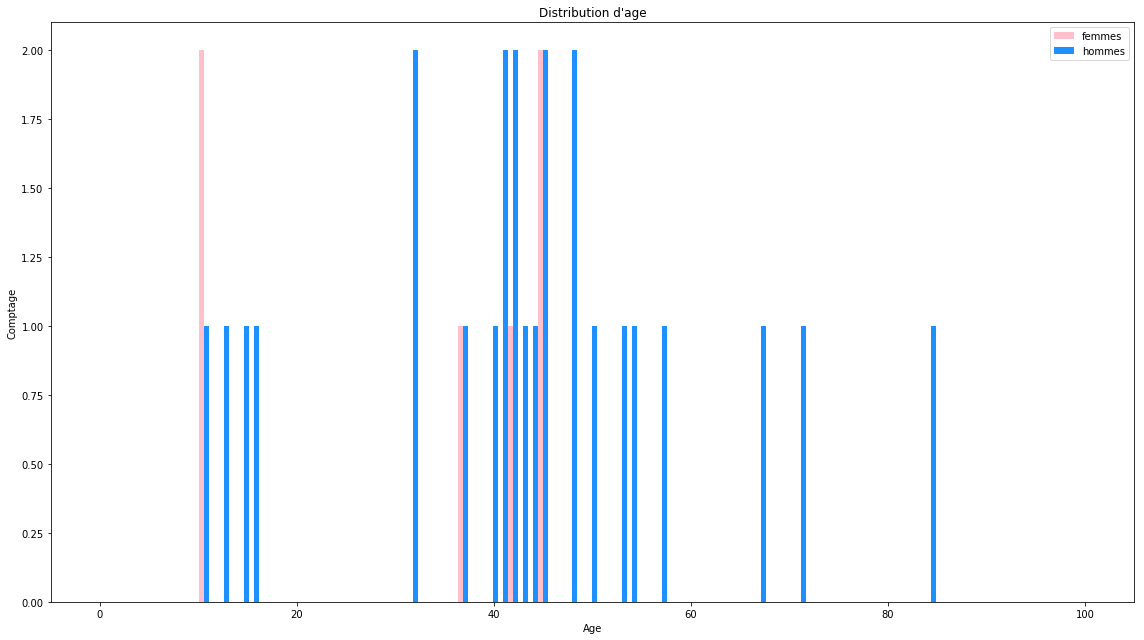

In [55]:
histo(ages[0],ages[1])

**Intervalle des années des films dans la base** 


In [56]:

annees = []
for i in range(len(dict_films)):
    if (dict_films[i] in dict_film_dateS):
        if(dict_film_dateS[dict_films[i]]!='\\N'):
            annees.append(dict_film_dateS[dict_films[i]])

# list    
print("Annees:", min(annees),"-",max(annees))

Annees: 1894 - 2020


**Distribution d'age** 

 + pour tous les films de la base pour les années 1894 - 2020

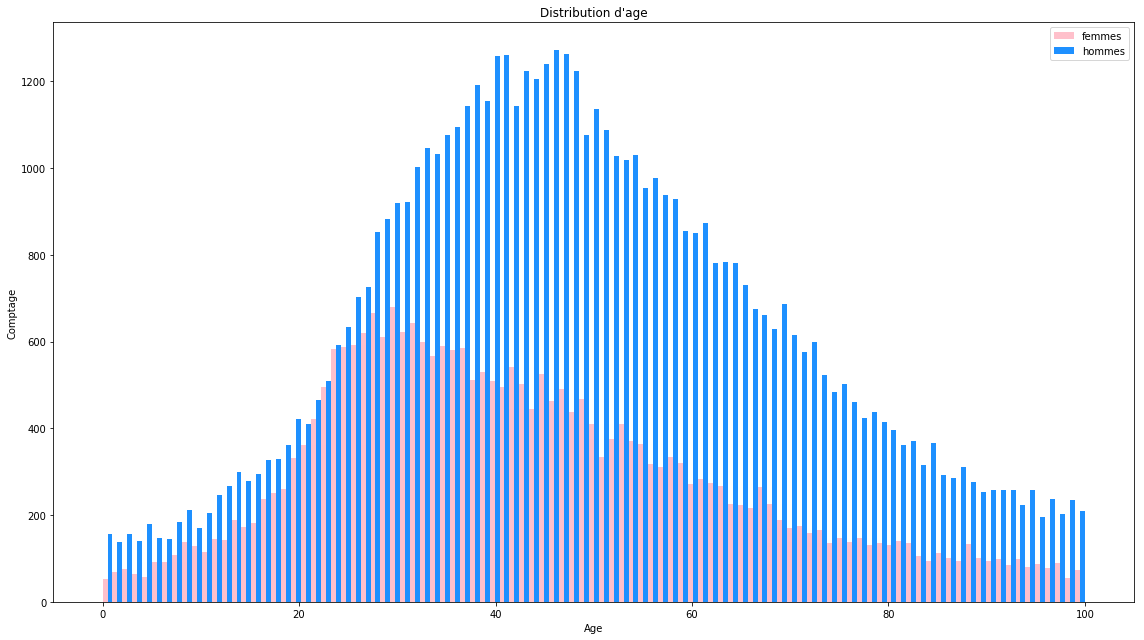

In [57]:
ages_femme = []
ages_homme = []
for i in range(len(dict_films)):
    ages = agesFromFilm(dict_films[i])
    ages_femme = ages_femme + ages[0]
    ages_homme = ages_homme + ages[1]
    

histo(ages_femme,ages_homme)


Histogramme de la répartition des acteurs homme et femme dans les films présents sur imdb depuis 120 ans, soit depuis l’année 1894.
 
1. L’analyse de cette base de données montre qu’il y a davantage de données sur l’âge des acteurs homme que sur l’âge des actrices. 
En chiffre sur l’ensemble des acteurs il y a environ deux fois plus d’homme que de femme.
Nombre d’homme :  198097
Nombre de femme :  93150
 
2. L’âge moyen le plus représenté pour des femmes est entre 27-30 ans, pour les hommes entre 40-46 ans

3. L’histogramme montre qu’il y a une croissance forte du nombre d’actrice avant 30ans et que ce nombre diminue lentement jusqu’à l’âge le plus avancé.
Pour les hommes on voit une croissance forte du nombre d’acteur jusqu’à environ 40 ans et une décroissance du nombre d’acteur également forte jusqu’au plus vieille âge.





**Age moyen pour genre à travers les années**

In [58]:
ages_mean_femme = []
ages_mean_homme = []
year_list = []
ages_films = []
# pour les annes 1894-2020
for year in range(1894,2020):
    if str(year) in dict_film_dateS_inv: #si cle existe
        tmp_mean_ages_f = []
        tmp_mean_ages_h = []
        # calculer l'age moyen des acteurs f et m par annee
        for film in dict_film_dateS_inv[str(year)]:
            ages = agesFromFilm(film)
            # calculer l'age moyen des acteurs f et m par film
            if ages[0] and ages[1]: #si non-vide
                tmp_mean_ages_f.append(np.mean(ages[0]))
                tmp_mean_ages_h.append(np.mean(ages[1]))
                ages_films.append([year,film,np.mean(ages[0]),np.mean(ages[1])])
        
        if tmp_mean_ages_f and tmp_mean_ages_h:#si non-vide
            year_list.append(int(year))
            ages_mean_femme.append(np.mean(tmp_mean_ages_f))
            ages_mean_homme.append(np.mean(tmp_mean_ages_h))


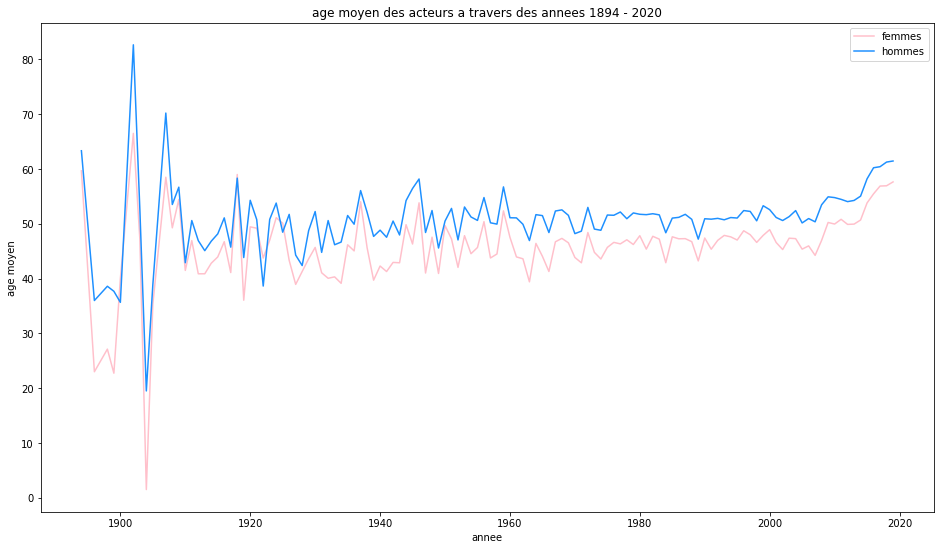

In [59]:
plt.plot(year_list,ages_mean_femme, label="femmes", color="pink")
plt.ylabel('age moyen')
plt.xlabel('annee')
plt.title("age moyen des acteurs a travers des annees 1894 - 2020")
plt.plot(year_list,ages_mean_homme, label="hommes",color="dodgerblue")
plt.legend()
plt.show() 

In [60]:
print("ages Max: femme:",int(max(ages_mean_femme)),"homme:",int(max(ages_mean_homme)))
print("et c'est dans film:", ages_films[7][0],ages_films[7][1])

ages Max: femme: 66 homme: 82
et c'est dans film: 1899 The Sign of the Cross


In [61]:
print("ages Min: femme:",int(min(ages_mean_femme)),"homme:",int(min(ages_mean_homme)))
print("et c'est dans film:", ages_films[9][0],ages_films[9][1])

ages Min: femme: 1 homme: 19
et c'est dans film: 1902 Jack and the Beanstalk


On observe que les données d'age moyen des acteurs masculins et feminins pour les films
1899 The Sign of the Cross et 1902 Jack and the Beanstalk à coup sûr ne correspondent pas à la réalité. On observe les grandes sauts d'amplitude pour des films avant des années 30 à la suite du manque des données d'age de naissance des acteurs.

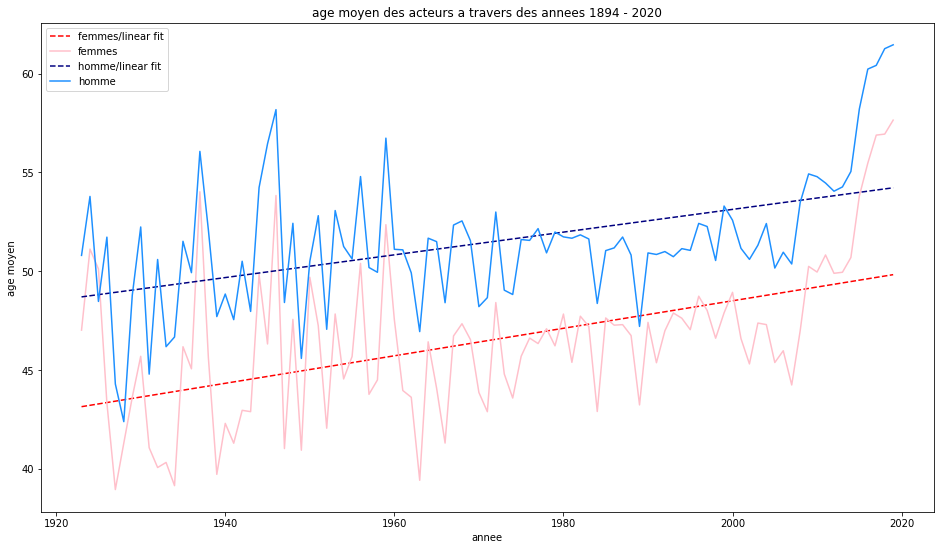

In [64]:
year_list_new = year_list[25:]
ages_mean_femme_new = ages_mean_femme[25:]
ages_mean_homme_new = ages_mean_homme[25:]

fit_f = np.polyfit(year_list_new, ages_mean_femme_new, 1)
fit_fn_f = np.poly1d(fit_f)
fit_h = np.polyfit(year_list_new, ages_mean_homme_new, 1)
fit_fn_h = np.poly1d(fit_h)

plt.plot(year_list_new, fit_fn_f(year_list_new), label="femmes/linear fit", color="red",linestyle='dashed')
plt.plot(year_list_new, ages_mean_femme_new, label="femmes",color="pink")
plt.plot(year_list_new, fit_fn_h(year_list_new), label="homme/linear fit",color="navy",linestyle='dashed')
plt.plot(year_list_new, ages_mean_homme_new, label="homme",color="dodgerblue")
plt.ylabel('age moyen')
plt.xlabel('annee')
plt.title("age moyen des acteurs a travers des annees 1894 - 2020")
plt.legend()
plt.show() 

Quelle est difference entre ages des acteurs hommes et femmes il y 100 ans et aujourdhui? 

In [65]:
print("1920:",fit_fn_h(1920)-fit_fn_f(1920))
print("2020:",fit_fn_h(2020)-fit_fn_f(2020))

1920: 5.5942726557807845
2020: 4.386147272952783


Ceci nous indique la tendance de rapprochement des deux courbes

**On observe que :**
1. l’âge moyen des acteurs (homme) est **plus grand de 5 ans** que chez les actrices sur 100 ans. 
2. la tendance de **rapprochement** des deux courbes, ce qui veut dire que **l’écart entre les âges moyens diminue**
3. il y a une **augmentation de l’âge moyen** d’environ 5 ans pour les hommes et pour les femmes sur 100 ans, ce chiffre est en continuel augmentation. 
 
 
 # Partie1
**Intro** : 
On voit qu’il y a **un rapport entre l’âge d’un acteur et son sexe**.
Le sexe d’un acteur devrait être un **critère important** pour prédire plus facilement l’âge de ce dernier.
 
**idée**: on veut prédire l’âge d'un acteur et montrer que la prédiction avec genre/sexe est plus précise que sans ;) 
On va utiliser la base d'apprentissage avec les attributs suivants :
-       Genre (catégorie) du film où la personne a joué
-       Nombre de film joué,
-       Budget moyen des film joué 
-       Avec ou sans sexe d'une personne


**Avant la construction des bases d'apprentissage:** Creation des nouvelles caractéristiques utiles

In [66]:
# dans combien de films pour chaque categorie a joué un acteur 
def combien_film_dans_categorie(acteur):
    genres_films_actor = {}
    liste_genre = []
    if acteur in dict_act_films: # si existe cle
        for film_id in dict_act_films[acteur]:
            for cat in dict_film_genres[film_id]:
                liste_genre.append(cat) # liste de tous les categories
                
    # calculer la frequence pour chaque categorie
    for cat in liste_genre:
        genres_films_actor[cat]=liste_genre.count(cat)
   
    return genres_films_actor

print(combien_film_dans_categorie('Tom Hanks'))


{'Adventure': 6, 'Animation': 3, 'Children': 5, 'Comedy': 18, 'Fantasy': 8, 'Drama': 29, 'IMAX': 1, 'Romance': 11, 'War': 3, 'Documentary': 2, 'Action': 12, 'Horror': 6, 'Sci-Fi': 6, 'Thriller': 10, 'Crime': 4, 'Mystery': 5, 'Western': 3, 'Musical': 3}


In [141]:
# dans combien de films pour chaque categorie a joué un acteur 
def categorie_films(acteur):
    genres_films_actor = set()
    if acteur in dict_act_films: # si existe cle
        for film_id in dict_act_films[acteur]:
            for cat in dict_film_genres[film_id]:
                genres_films_actor.add(cat) # liste de tous les categories
                    
        return list(genres_films_actor)

    else:
        #print("problem:",acteur,"n'est pas dans dict_act_films")
        return 0
    

print(categorie_films('Tom Hanks'))

['Children', 'Documentary', 'Fantasy', 'Adventure', 'IMAX', 'Comedy', 'Drama', 'Sci-Fi', 'Animation', 'Western', 'Musical', 'Mystery', 'War', 'Romance', 'Action', 'Thriller', 'Crime', 'Horror']


In [181]:

# acteur dans les films avec le budget connu
acteurs_film_avec_budget = set()
for f in dict_film_budjet:
    if f in dict_films_inv:
        if dict_films_inv[f] in dict_act_films_inv:
            for a in dict_act_films_inv[dict_films_inv[f]]:
                acteurs_film_avec_budget.add(a)
    
    
acteurs_film_avec_budget=list(acteurs_film_avec_budget)
len(acteurs_film_avec_budget)

53096

+ **Dictionnaire (film=>budget)**

In [ ]:
# Dictionnaire avec les films (film => budjet )
dict_film_budjet = dict()
for i in range(movie_meta_data.movie_facebook_likes.count()):
    dict_film_budjet[movie_meta_data.movie_title.loc[i].replace('\xa0','').strip()] = movie_meta_data.budget.loc[i]

In [432]:
# nb de film avec le budget connu de la base
cpt=0
for f in dict_film_budjet:
    if f in dict_films_inv:
        cpt = cpt + 1
        
print(cpt)   

4024


**1.Construction d'une base d'apprentissage SANS GENRE**

In [462]:
columns = ["name"]+list_genres_fims+["nb_films","budjet", "age"]
df_acteurs = pd.DataFrame(columns=columns)
i = 0

for act in acteurs_film_avec_budget[0:10000]: #len(actors_inv)
    
    categorie = categorie_films(act)
    if categorie!=0:
        # affecter 1 si acteur a jouer dans un film de cette categorie
        for cat in categorie_films(act):
            df_acteurs.loc[i, cat] = 1   
        
    # affecter nom d'acteur
    df_acteurs.loc[i,"name"] = actors_inv[i]
    # calculer nb de film pour l'acteur i
    df_acteurs.loc[i,"nb_films"] = len(dict_act_films[act])
    
        
    # ajouter l'age si la personne n'est pas decedée
    if (act not in dict_act_dateD) and (act in dict_act_dateN):
        df_acteurs.loc[i,"age"] = 2019-int(dict_act_dateN[act])
            
    list_bubget_avg = list()
    if act in dict_act_films:
        for id_f in dict_act_films[act]:
            if id_f in dict_films:
                if dict_films[id_f] in dict_film_budjet:
                    list_bubget_avg.append(dict_film_budjet[dict_films[id_f]])

    df_acteurs.loc[i,"budjet"] = np.mean(list_bubget_avg)   
            
    i=i+1    
        
# supprimer les personnes decedées
df_acteurs = df_acteurs.dropna(subset=["age"])

# mettre les zero pour les genres de films qui ne sont pas definis: NaN
df_acteurs[list_genres_fims] = df_acteurs[list_genres_fims].fillna(0)

# convertir to int 
df_acteurs[list_genres_fims+["nb_films","age"]] = df_acteurs[list_genres_fims+["nb_films","age"]].astype(int)

# Supprimer la colonne '(no genres listed)'
df_acteurs = df_acteurs.drop(['(no genres listed)'], axis=1)

df_acteurs = df_acteurs.drop(['name'], axis=1)

# suprimer les acteur sans le budjet connu
df_acteurs = df_acteurs.dropna(subset=["budjet"])

df_acteurs = df_acteurs.dropna()
    
#df_acteurs.astype(int)
df_acteurs.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,nb_films,budjet,age
0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2,9.65e+07,53
1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,2,6e+07,39
8,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,27,1.98958e+07,47
11,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,3,3.45e+07,59
12,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,3,1.75e+08,74


In [463]:
df_acteurs.tail()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,nb_films,budjet,age
9980,1,1,1,1,0,1,1,1,1,0,...,0,0,1,0,1,0,0,12,6.78571e+07,55
9982,1,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,5,2.5e+06,52
9985,0,0,0,0,0,1,1,1,0,1,...,1,1,0,0,0,0,0,2,1.5e+07,40
9988,0,0,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,6,4.665e+07,37
9997,1,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,3,270000,37


**Regression lineaire / prediction SANS SEXE d'un acteur** 

In [464]:
X = df_acteurs[list_genres_fims+["nb_films","budjet"]]
Y = df_acteurs[['age']]

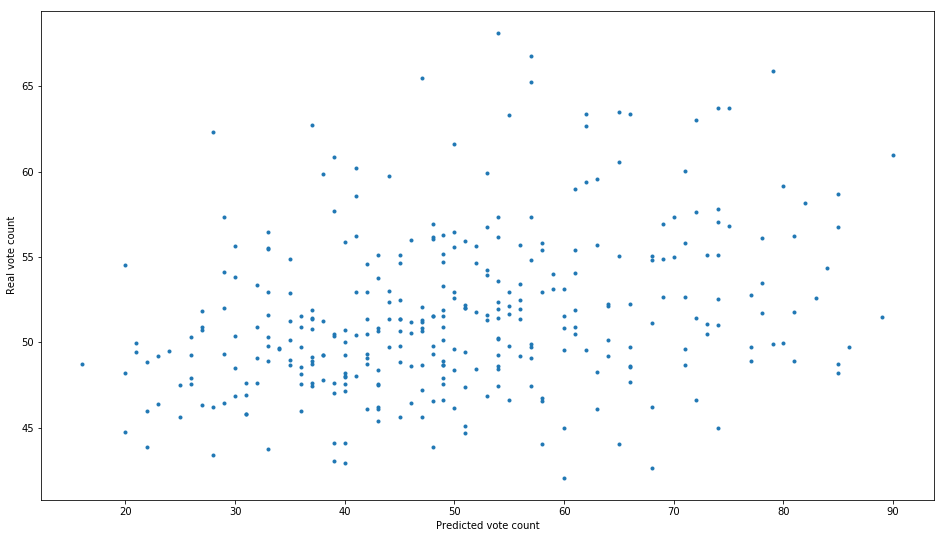

score: 0.07684691109024355


In [465]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1020)
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
plt.plot(y_test,y_pred,'.')

plt.xlabel('Predicted vote count')
plt.ylabel('Real vote count')

plt.show()

print("score:",regr.score(X_train,y_train))



**2. AVEC GENRE**

In [466]:
df_acteurs_sexe = df_acteurs

i=0
for act in acteurs_film_avec_budget[0:10000]:
    if act in dict_actor_sexe:
        df_acteurs_sexe.loc[i,"sexe"] = dict_actor_sexe[act]
    i=i+1

    
new_data = pd.get_dummies(df_acteurs_sexe['sexe'], prefix = 'sexe')
df_acteurs_sexe = pd.concat([df_acteurs_sexe, new_data], axis=1)

#new_data['Europe']=-1
#new_data.iloc[0][0]
#new_data.loc[new_data['Region'] == 'European Union','Europe'] = 1

# Supprimer la colonne '(no genres listed)'
#df_acteurs = df_acteurs.drop(['(no genres listed)'], axis=1)
df_acteurs_sexe = df_acteurs_sexe[df_acteurs.sexe != 0]

df_acteurs_sexe = df_acteurs_sexe.drop(['sexe'], axis=1)
df_acteurs_sexe = df_acteurs_sexe.drop(['sexe_0.0'], axis=1)

# suprimer les acteur sans le budjet connu
#df_acteurs = df_acteurs.dropna(subset=["budjet"])

df_acteurs_sexe = df_acteurs_sexe.dropna()
    
#df_acteurs.astype(int)
df_acteurs_sexe.head()
df_acteurs_sexe.tail()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Documentary,War,Musical,Western,Film-Noir,nb_films,budjet,age,sexe_femme,sexe_homme
9968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4e+07,34.0,1,0
9971,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,3.0,3.5e+07,48.0,1,0
9980,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,12.0,6.78571e+07,55.0,0,1
9982,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5.0,2.5e+06,52.0,1,0
9988,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,6.0,4.665e+07,37.0,1,0


**Regression lineaire / prediction AVEC SEXE d'un acteur**

In [ ]:
X = df_acteurs_sexe[list_genres_fims+["nb_films","budjet","sexe_homme", "sexe_femme"]]
#X = cl.normalisation(X)
Y = df_acteurs_sexe[['age']]

In [ ]:
the_set=ls.LabeledSet(len(list_genres_fims)+4)
l=[]
for i in range(len(df_acteurs_sexe)):
    the_set.addExample(X.iloc[i].values, Y.iloc[i][0])

ls.affiche_base(the_set)

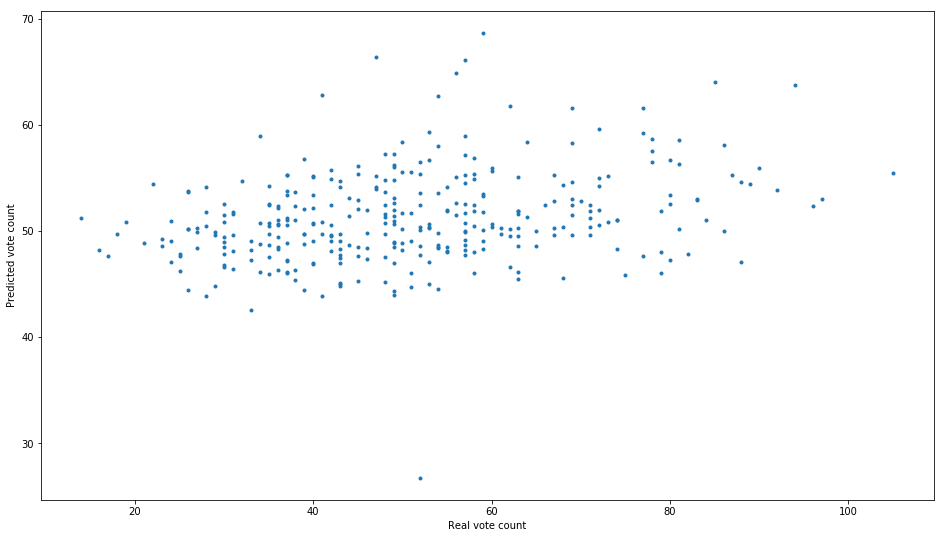

In [428]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1000)
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
plt.plot(y_test,y_pred,'.')

plt.ylabel('Predicted vote count')
plt.xlabel('Real vote count')

plt.show()



+ Real vote count: le distribution des données reals: l'age varie de 20 jusqu'a 100 ans.
+ Predire vote count: les valeurs predis varie entre 40 et 65 ans. 

**2b. Classification** 

predire le sexe d'un acteur

In [472]:
df_acteurs_sexe_age = df_acteurs_sexe

i = 0
for act in acteurs_film_avec_budget[0:10000]:
    if act in dict_actor_sexe:
        df_acteurs_sexe_age.loc[i,"sexe"] = dict_actor_sexe[act] 
    i=i+1

df_acteurs_sexe_age = df_acteurs_sexe_age.dropna(subset=["sexe"])
df_acteurs_sexe_age = df_acteurs_sexe_age[df_acteurs_sexe.sexe != 0]

df_acteurs_sexe_age['homme_femme']=-1
df_acteurs_sexe_age.loc[df_acteurs_sexe_age['sexe'] == 'homme','homme_femme'] = 1


#df_acteurs_sexe_age = df_acteurs_sexe_age.drop(['name'], axis=1)
df_acteurs_sexe_age = df_acteurs_sexe_age.drop(['sexe'], axis=1)
df_acteurs_sexe_age = df_acteurs_sexe_age.drop(['sexe_femme'], axis=1)
df_acteurs_sexe_age = df_acteurs_sexe_age.drop(['sexe_homme'], axis=1)
df_acteurs_sexe_age = df_acteurs_sexe_age.dropna()

#df_acteurs_sexe_age = df_acteurs_sexe_age.astype(int)

df_acteurs_sexe_age


,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,...,IMAX,Documentary,War,Musical,Western,Film-Noir,nb_films,budjet,age,homme_femme
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6e+07,39.0,1
8,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,27.0,1.98958e+07,47.0,-1
11,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.45e+07,59.0,1
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.75e+08,74.0,1
14,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,11.0,3.36667e+07,69.0,1
16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,50.0,6.62458e+07,79.0,1
23,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3.55e+07,42.0,1
24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,11.0,7.125e+07,84.0,1
25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.5e+06,85.0,1
31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,14.0,5.13857e+07,39.0,1


In [ ]:
X = df_acteurs_sexe[list_genres_fims+["nb_films","budjet"]]
X=cl.normalisation(X)
Y = df_acteurs_sexe[['homme_femme']]

In [ ]:
the_set2=ls.LabeledSet(len(list_genres_fims)+2)
l=[]
for i in range(len(df_acteurs_sexe)):
    the_set2.addExample(X.iloc[i].values, Y.iloc[i][0])

#ls.affiche_base(the_set2)

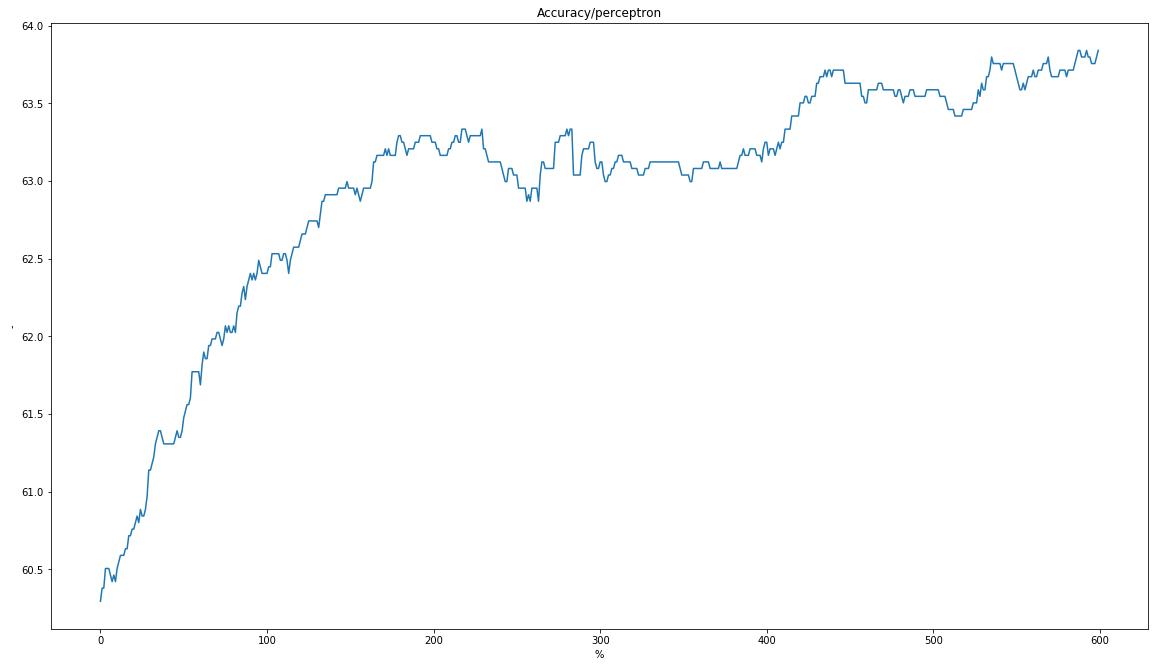

-1

In [320]:
perceptron_p = cl.ClassifierPerceptron(len(list_genres_fims)+2, 0.000001)
l1=[]
l2=[]
for i in range(600):
    perceptron_p.train(the_set2)
    l1.append(i)
    l2.append(perceptron_p.accuracy(the_set2))
    
    
plt.plot(l1,l2)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [16,9]
plt.ylabel('-')
plt.xlabel('%')
plt.title("Accuracy/perceptron")
plt.show()

# verification de perceptron
perceptron_p.predict(the_set2.getX(1))